# Task 01 : Natural Gas Prices

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [18]:
data = pd.read_csv('Nat_Gas.csv')

In [19]:
len(data)

48

In [20]:
data.head(20)

,Dates,Prices
0,10/31/20,10.10
1,11/30/20,10.30
2,12/31/20,11.00
3,1/31/21,10.90
4,2/28/21,10.90
5,3/31/21,10.90
6,4/30/21,10.40
7,5/31/21,9.84
8,6/30/21,10.00
9,7/31/21,10.10


In [21]:
data["Dates"] = pd.to_datetime(data["Dates"])
data = data.set_index("Dates")
data

/tmp/ipykernel_20164/3219194647.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["Dates"] = pd.to_datetime(data["Dates"])


,Prices
Dates,
2020-10-31,10.10
2020-11-30,10.30
2020-12-31,11.00
2021-01-31,10.90
2021-02-28,10.90
2021-03-31,10.90
2021-04-30,10.40
2021-05-31,9.84
2021-06-30,10.00


In [22]:
data.dtypes

Prices    float64
dtype: object

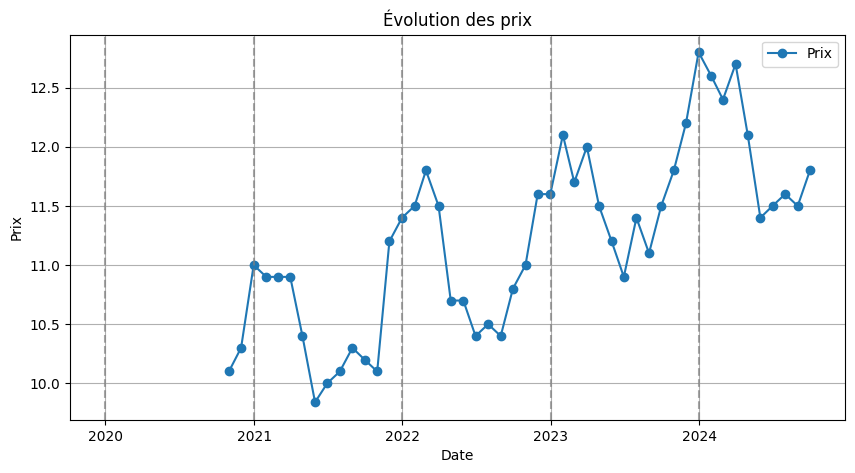

In [23]:

# Tracé de la courbe
plt.figure(figsize=(10,5))
plt.plot(data.index, data["Prices"], marker="o", label="Prix")

# Ajout d'une ligne verticale à chaque changement d'année
years = data.index.year.unique()
for y in years:
    plt.axvline(pd.Timestamp(f"{y}-01-01"), color="gray", linestyle="--", alpha=0.7)

# Mise en forme
plt.xlabel("Date")
plt.ylabel("Prix")
plt.title("Évolution des prix")
plt.legend()
plt.grid(True)
plt.show()


In [24]:
model = SARIMAX(data["Prices"], order=(1,1,1), seasonal_order=(1,1,1,12))
results = model.fit()
forecast = results.get_forecast(steps=12)
print(forecast.predicted_mean)

/mnt/c/DEV/QuantitativeFinance_JPMorgan/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/mnt/c/DEV/QuantitativeFinance_JPMorgan/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/mnt/c/DEV/QuantitativeFinance_JPMorgan/.venv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


2024-10-31    11.987407
2024-11-30    12.610165
2024-12-31    12.925193
2025-01-31    13.064802
2025-02-28    13.012327
2025-03-31    13.044090
2025-04-30    12.439716
2025-05-31    12.121468
2025-06-30    11.987333
2025-07-31    12.212139
2025-08-31    12.132050
2025-09-30    12.378493
Freq: ME, Name: predicted_mean, dtype: float64


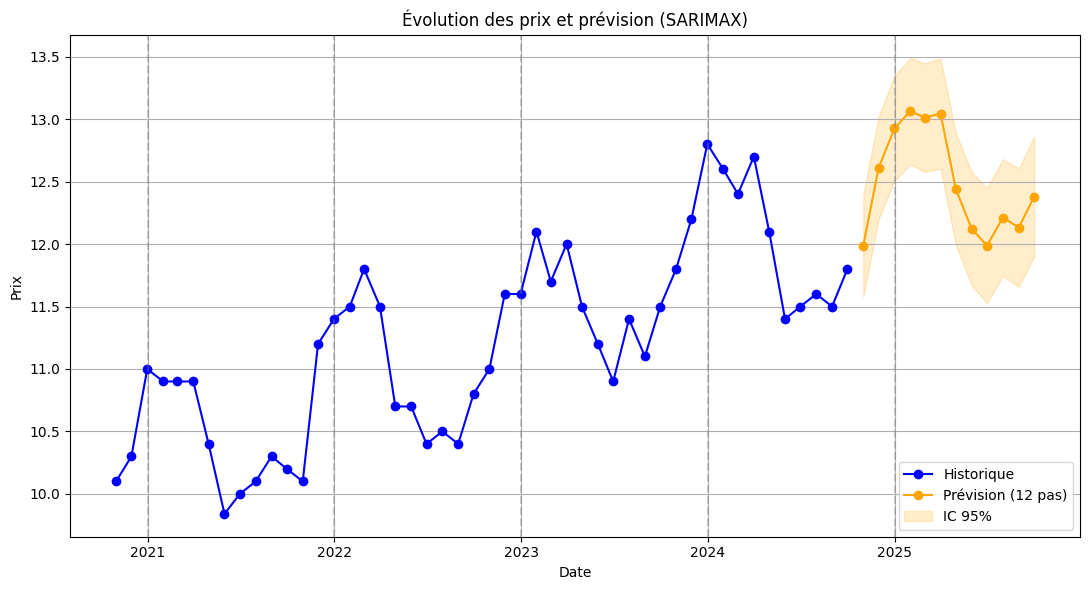

In [25]:
# forecast est issu de results.get_forecast(steps=12)
pm = forecast.predicted_mean              # valeurs prédites
ci = forecast.conf_int()                  # intervalles de confiance

plt.figure(figsize=(11,6))

# Série historique
plt.plot(data.index, data["Prices"], marker="o", color="blue", label="Historique")

# Prévision
plt.plot(pm.index, pm.values, marker="o", color="orange", label="Prévision (12 pas)")

# Intervalle de confiance
plt.fill_between(pm.index, ci.iloc[:, 0], ci.iloc[:, 1], 
                 color="orange", alpha=0.2, label="IC 95%")

# Lignes verticales au changement d’année
years = pd.Index(data.index.append(pm.index)).year.unique()
for y in years:
    x = pd.Timestamp(f"{y}-01-01")
    if data.index.min() <= x <= pm.index.max():
        plt.axvline(x, color="gray", linestyle="--", alpha=0.4)

# Mise en forme
plt.xlabel("Date")
plt.ylabel("Prix")
plt.title("Évolution des prix et prévision (SARIMAX)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [26]:
forecast_df = forecast.predicted_mean.to_frame(name="Prices")

In [27]:
data = pd.concat([data, forecast_df])
prices = data["Prices"]

data_daily = data.resample("D").asfreq()
data_daily["Prices"] = data_daily["Prices"].interpolate(method="linear")

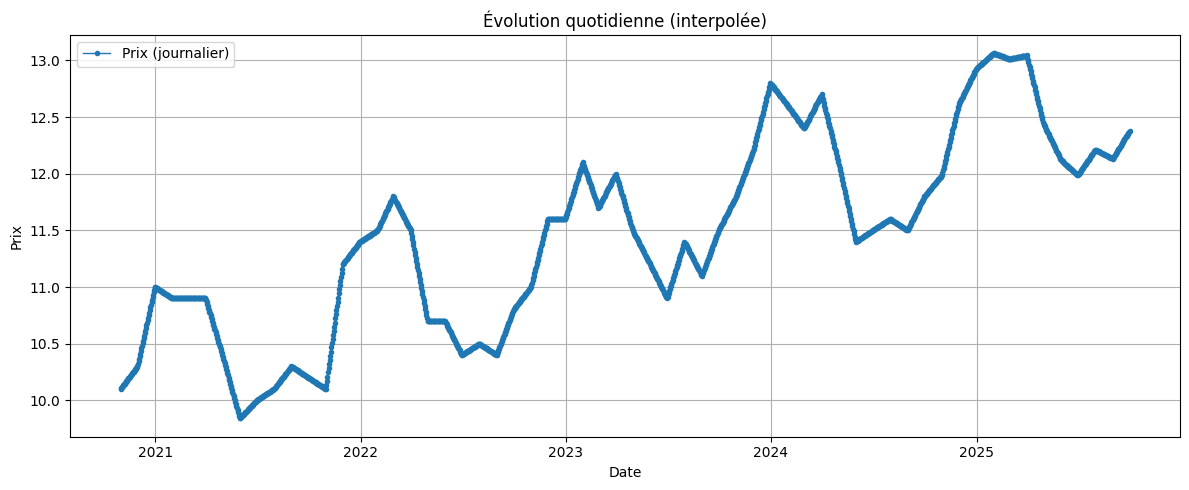

In [30]:


plt.figure(figsize=(12,5))
plt.plot(data_daily.index, data_daily["Prices"], marker=".", linewidth=1, label="Prix (journalier)")
plt.xlabel("Date")
plt.ylabel("Prix")
plt.title("Évolution quotidienne (interpolée)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
